
#### Loading required Libraries

In [3]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
#MCAR

df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [15]:
# Missing not at random (MNAR)
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

### All the techniques for Handling Missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

1. Mean/ Median/Mode replacement

In [11]:
df = pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [25]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'].median()

28.0

In [8]:
median = df.Age.median()
median

28.0

In [9]:
df['Age'].fillna(median,inplace=True)

In [10]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [29]:
df['Age_median'] = df['Age'].fillna(median)

In [13]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [14]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [15]:
impute_nan(df,"Age",median)

In [16]:
df

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [17]:
print("Print the SD for Age : ",df['Age'].std())
print("Print the SD for Age_Median : ",df['Age_median'].std())

Print the SD for Age :  14.526497332334044
Print the SD for Age_Median :  13.019696550973194


<AxesSubplot:ylabel='Density'>

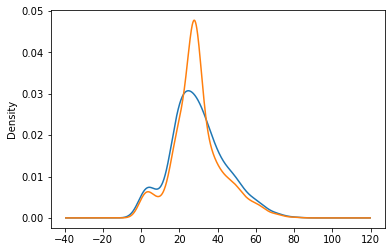

In [56]:
df['Age'].plot(kind="kde")
df['Age_median'].plot(kind='kde')

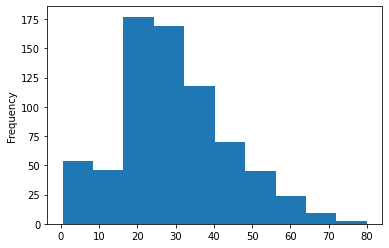

In [54]:
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)

df['Age'].plot(kind="hist")
#df['Age_median'].plot(kind='hist')
# lines, labels = ax.get_legend_handles_labels()
# ax.legend(lines,labels,loc='best')


plt.show()

<AxesSubplot:ylabel='Frequency'>

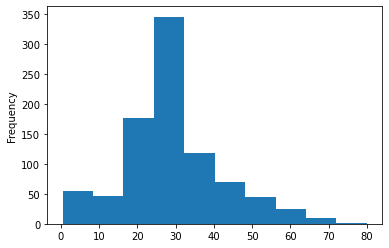

In [55]:
df['Age_median'].plot(kind='hist')

### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

#### 2. Random Sample Imputation

In [106]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [19]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 21.0 KB


In [89]:
df['Age'].isnull().sum()

177

In [87]:
df['Age'].dropna()

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [95]:
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [96]:
random_sample = df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

In [97]:
random_sample.index = df[df['Age'].isnull()].index

In [99]:
random_sample

5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [100]:
df.loc[df['Age'].isnull(),'Age']=random_sample

In [101]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [107]:
def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"]=random_sample


In [113]:
random_sample


5      28.00
17     50.00
19      0.92
26     36.00
28     26.00
       ...  
859    22.00
863    25.00
868    15.00
878    34.00
888    15.00
Name: Age, Length: 177, dtype: float64

In [112]:
df.loc[df['Age'].isnull(),'Age']

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [108]:
impute_nan(df,'Age',28)

In [109]:
df

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0
...,...,...,...,...,...
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0


<AxesSubplot:ylabel='Density'>

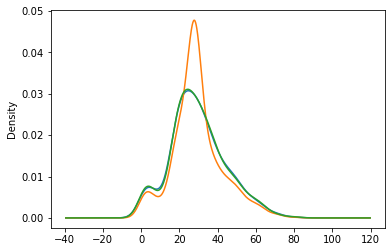

In [115]:
df['Age'].plot(kind="kde")
df['Age_median'].plot(kind='kde')
df['Age_random'].plot(kind='kde')

#### Capturing NaN value with a new feature

In [116]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [117]:
df['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [118]:
import numpy as np

In [123]:
df["Age_Nan"]=np.where(df['Age'].isnull(),1,0)
df['Age'].fillna(df['Age'].median(),inplace=True)

In [125]:
df["Age_Nan"].value_counts()

0    714
1    177
Name: Age_Nan, dtype: int64

In [126]:
df

,Survived,Age,Fare,Age_Nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


#### End of Distribuation Imputation

In [127]:
df=pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

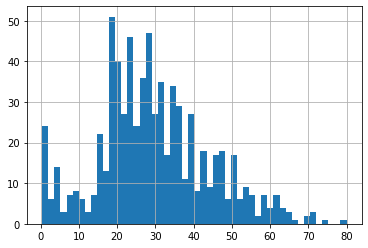

In [129]:
df.Age.hist(bins=50)

C:\Users\dell pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

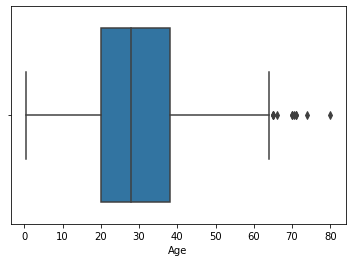

In [130]:
import seaborn as sns

sns.boxplot('Age',data=df)

In [136]:
extreme = df['Age'].mean()+3*df['Age'].std()

In [134]:
df['Age'].std()

14.526497332334044

In [139]:
df['Age_extreme'] = df['Age'].fillna(extreme)

In [140]:
df

,Survived,Age,Fare,Age_extreme
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
...,...,...,...,...
886,0,27.0,13.0000,27.00000
887,1,19.0,30.0000,19.00000
888,0,NaN,23.4500,73.27861
889,1,26.0,30.0000,26.00000


C:\Users\dell pc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_extreme'>

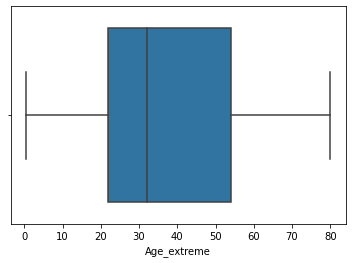

In [142]:
sns.boxplot('Age_extreme',data=df)

In [144]:
df = pd.read_csv("loan.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [145]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [165]:
df = pd.read_csv("loan.csv",usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [147]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [149]:
df.isna().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [159]:
df.BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

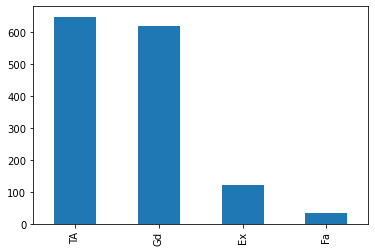

In [154]:
df.BsmtQual.value_counts().plot.bar()

In [161]:
df.BsmtQual.mode()[0]

'TA'

In [155]:
df.GarageType.mode()[0]

'Attchd'

In [156]:
df.FireplaceQu.mode()[0]

'Gd'

<AxesSubplot:>

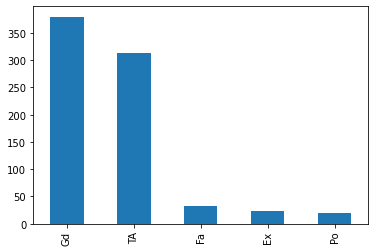

In [157]:
df.FireplaceQu.value_counts().plot.bar()

In [162]:
def impute_nan(df,variable):
    mF = df[variable].mode()[0]
    df[variable].fillna(mF,inplace=True)

In [163]:
impute_nan(df,'FireplaceQu')

<AxesSubplot:>

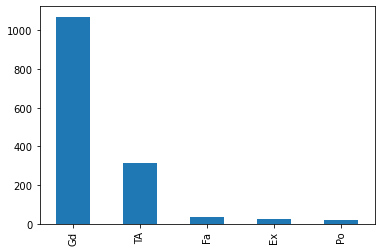

In [164]:
df.FireplaceQu.value_counts().plot.bar()

In [167]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [168]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [170]:
df.FireplaceQu.fillna("Others",inplace=True)

In [171]:
df.isnull().sum()

BsmtQual       37
FireplaceQu     0
GarageType     81
SalePrice       0
dtype: int64

<AxesSubplot:>

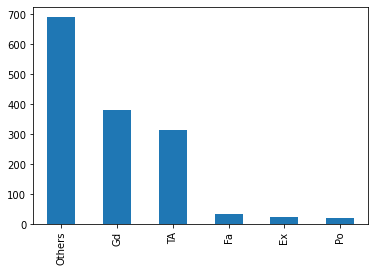

In [172]:
df.FireplaceQu.value_counts().plot.bar()

# One Hot Encoding

In [17]:
import pandas as pd
import numpy as np

df=pd.read_csv("titanic.csv")

In [18]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [19]:
pd.get_dummies(df).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
pd.get_dummies(df['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [23]:
df.dropna(inplace=True)

In [24]:
df['Embarked'].unique()

array(['C', 'S', 'Q'], dtype=object)

In [27]:
pd.get_dummies(df,columns=['Sex','Embarked']).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,0,1,0,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,1,0,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,1,0,0,0,1


In [26]:
pd.get_dummies(df,columns=['Sex','Embarked'],drop_first=True).head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,1,0,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,0,0,1
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,0,0,1


#### Onehotencoding with many categories in a feature

In [29]:
df = pd.read_csv("mercedes.csv",usecols=["X0","X1","X2","X3","X4","X5","X6"])

In [34]:
df

,X0,X1,X2,X3,X4,X5,X6
0,k,v,at,a,d,u,j
1,k,t,av,e,d,y,l
2,az,w,n,c,d,x,j
3,az,t,n,f,d,x,l
4,az,v,n,f,d,h,d
...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d
4205,j,o,t,d,d,aa,h
4206,ak,v,r,a,d,aa,g
4207,al,r,e,f,d,aa,l


In [36]:
#pd.get_dummies(df)



In [33]:
len(df['X0'].unique())

47

In [39]:
for i in df.columns:
    print("For Column",i, "the unique labels found is",len(df[i].unique()))

For Column X0 the unique labels found is 47
For Column X1 the unique labels found is 27
For Column X2 the unique labels found is 44
For Column X3 the unique labels found is 7
For Column X4 the unique labels found is 4
For Column X5 the unique labels found is 29
For Column X6 the unique labels found is 12


In [53]:
df['X1'].value_counts()

aa    833
s     598
b     592
l     590
v     408
r     251
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
d       3
ab      3
q       3
Name: X1, dtype: int64

In [45]:
lst10 = df['X0'].value_counts().sort_values(ascending=False).head(10).index

In [46]:
lst10

Index(['z', 'ak', 'y', 'ay', 't', 'x', 'o', 'f', 'n', 'w'], dtype='object')

In [48]:
for i in lst10:
    df[i]=np.where(df["X0"]==i,1,0)

for i in lst10_x1:
    df[i]=np.where(df["X1"]==i,1,0)

for i in lst10_x1:
    df[i]=np.where(df["X1"]==i,1,0)

,X0,X1,X2,X3,X4,X5,X6,z,ak,y,ay,t,x,o,f,n,w
0,k,v,at,a,d,u,j,0,0,0,0,0,0,0,0,0,0
1,k,t,av,e,d,y,l,0,0,0,0,0,0,0,0,0,0
2,az,w,n,c,d,x,j,0,0,0,0,0,0,0,0,0,0
3,az,t,n,f,d,x,l,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,0,1,0,0,0,0,0,0,0,0
4205,j,o,t,d,d,aa,h,0,0,0,0,0,0,0,0,0,0
4206,ak,v,r,a,d,aa,g,0,1,0,0,0,0,0,0,0,0
4207,al,r,e,f,d,aa,l,0,0,0,0,0,0,0,0,0,0


### Ordinal Number Encoding

In [54]:
df=pd.read_csv("days.csv")

In [55]:
df

,Unnamed: 0,Day,weekday
0,0,2022-04-27 09:25:37.633555,Wednesday
1,1,2022-04-26 09:25:37.633555,Tuesday
2,2,2022-04-25 09:25:37.633555,Monday
3,3,2022-04-24 09:25:37.633555,Sunday
4,4,2022-04-23 09:25:37.633555,Saturday
5,5,2022-04-22 09:25:37.633555,Friday
6,6,2022-04-21 09:25:37.633555,Thursday
7,7,2022-04-20 09:25:37.633555,Wednesday
8,8,2022-04-19 09:25:37.633555,Tuesday
9,9,2022-04-18 09:25:37.633555,Monday


In [56]:
rankdict={'Monday':1,"Tuesday":2,"Wednesday":3,"Thursday":4,"Friday":5,"Saturday":6,"Sunday":7}

In [59]:
df["weekday"]

0     Wednesday
1       Tuesday
2        Monday
3        Sunday
4      Saturday
5        Friday
6      Thursday
7     Wednesday
8       Tuesday
9        Monday
10       Sunday
11     Saturday
12       Friday
13     Thursday
14    Wednesday
Name: weekday, dtype: object

In [60]:
df['Weekday_ord']=df["weekday"].map(rankdict)

In [61]:
df

,Unnamed: 0,Day,weekday,Weekday_ord
0,0,2022-04-27 09:25:37.633555,Wednesday,3
1,1,2022-04-26 09:25:37.633555,Tuesday,2
2,2,2022-04-25 09:25:37.633555,Monday,1
3,3,2022-04-24 09:25:37.633555,Sunday,7
4,4,2022-04-23 09:25:37.633555,Saturday,6
5,5,2022-04-22 09:25:37.633555,Friday,5
6,6,2022-04-21 09:25:37.633555,Thursday,4
7,7,2022-04-20 09:25:37.633555,Wednesday,3
8,8,2022-04-19 09:25:37.633555,Tuesday,2
9,9,2022-04-18 09:25:37.633555,Monday,1


#### Count Or Frequency Encoding

In [79]:
train_set = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data' , header = None,index_col=None)


In [71]:
train_set.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [72]:
train_set.shape

(32561, 15)

In [80]:
#Drop column
train_set.drop(0,axis=1,inplace=True)

In [81]:
train_set


,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [83]:
columns=[1,3,5,6,7,8,9,13]
train_set = train_set[columns]

In [85]:
train_set.head()

,1,3,5,6,7,8,9,13
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [87]:
train_set.columns=['Employment','Degree','Status','Designation','family_job','Race','Sex','Country']

In [90]:
train_set.columns

Index(['Employment', 'Degree', 'Status', 'Designation', 'family_job', 'Race',
       'Sex', 'Country'],
      dtype='object')

In [97]:
train_set.rename({'Status':'Status_1'},axis=1)

,Employment,Degree,Status_1,Designation,family_job,Race,Sex,Country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [100]:
len(train_set['Country'].unique())

42

In [107]:
for feature in train_set.columns:
    print(feature,":",len(train_set[feature].unique()),"Labels")

Employment : 9 Labels
Degree : 16 Labels
Status : 7 Labels
Designation : 15 Labels
family_job : 6 Labels
Race : 5 Labels
Sex : 2 Labels
Country : 42 Labels


In [111]:
country_map = train_set['Country'].value_counts().to_dict()

In [123]:
#country_map

In [116]:
train_set['Country']= train_set['Country'].map(country_map)

<ipython-input-116-4852160dbe1a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set['Country']= train_set['Country'].map(country_map)


In [117]:
train_set['Country']

0        29170
1        29170
2        29170
3        29170
4           95
         ...  
32556    29170
32557    29170
32558    29170
32559    29170
32560    29170
Name: Country, Length: 32561, dtype: int64

#### Target Guided Ordinal Encoding

In [35]:
import pandas as pd
df =pd.read_csv("titanic.csv",usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [36]:
df['Cabin'].fillna('Missing',inplace=True)

In [4]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [37]:
df['Cabin'] = df['Cabin'].astype(str).str[0]

In [38]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [11]:
ordinalLabels = df.groupby(['Cabin'])['Survived'].mean().sort_values().index

In [8]:
df.groupby(['Cabin'])['Survived'].mean()

Cabin
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
M    0.299854
T    0.000000
Name: Survived, dtype: float64

In [ ]:
# Dict ----- Key --->['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D']
#            value--->[0,1,2,3,4,5,6,7,8]

# output ---->
{'T':0,'M':1,'A':2,'G':3,'C':4,'F':5,'B':6,'E':7,'D':8}

In [14]:
ordinalLabels

Index(['T', 'M', 'A', 'G', 'C', 'F', 'B', 'E', 'D'], dtype='object', name='Cabin')

In [24]:
dictNew={}
for i,k in enumerate(ordinalLabels,1):
    dictNew[k]=i


In [27]:
ordinalLabels2 = { k:i for i,k in enumerate(ordinalLabels,1) }

In [29]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [30]:
df['Cabin'] = df['Cabin'].map(ordinalLabels2)

In [31]:
df.head()

,Survived,Cabin
0,0,2
1,1,5
2,1,2
3,1,5
4,0,2


Mean Encoding based on Target

In [41]:
mean_ordinal = df.groupby(['Cabin'])['Survived'].mean().to_dict()

In [42]:
df['Cabin_new'] = df['Cabin'].map(mean_ordinal)

In [45]:
df['Cabin'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [44]:
mean_ordinal

{'A': 0.4666666666666667,
 'B': 0.7446808510638298,
 'C': 0.5932203389830508,
 'D': 0.7575757575757576,
 'E': 0.75,
 'F': 0.6153846153846154,
 'G': 0.5,
 'M': 0.29985443959243085,
 'T': 0.0}

In [43]:
df.head()

,Survived,Cabin,Cabin_new
0,0,M,0.299854
1,1,C,0.593220
2,1,M,0.299854
3,1,C,0.593220
4,0,M,0.299854


### Scaling

In [56]:
import pandas as pd
df=pd.read_csv('titanic.csv', usecols=['Pclass','Age','Fare','Survived'])
df.head()


,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [47]:
df.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [48]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [57]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [50]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [59]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [51]:
# sklearn
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = StandardScaler()
minmax = MinMaxScaler()

In [53]:
scDf= sc.fit_transform(df)

In [61]:
scDf

array([[-0.78927234,  0.82737724, -0.56573646, -0.50244517],
       [ 1.2669898 , -1.56610693,  0.66386103,  0.78684529],
       [ 1.2669898 ,  0.82737724, -0.25833709, -0.48885426],
       ...,
       [-0.78927234,  0.82737724, -0.1046374 , -0.17626324],
       [ 1.2669898 , -1.56610693, -0.25833709, -0.04438104],
       [-0.78927234,  0.82737724,  0.20276197, -0.49237783]])

In [63]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [71]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [65]:
updatedDF= pd.DataFrame(scDf)
updatedDF.head()


,0,1,2,3
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([-1.56610693, -1.32675851, -1.08741009, -0.84806167, -0.60871326,
        -0.36936484, -0.13001642,  0.10933199,  0.34868041,  0.58802883,
         0.82737724]),
 <BarContainer object of 10 artists>)

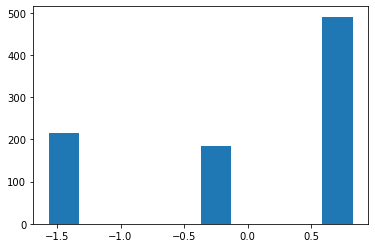

In [70]:
plt.hist(updatedDF[1])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([-2.22415608, -1.61258503, -1.00101397, -0.38944292,  0.22212813,
         0.83369919,  1.44527024,  2.05684129,  2.66841235,  3.2799834 ,
         3.89155445]),
 <BarContainer object of 10 artists>)

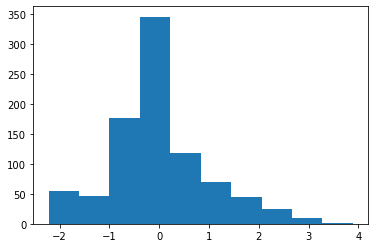

In [72]:
plt.hist(updatedDF[2])

(array([337., 182., 147.,  50.,  16.,  39.,  18.,  29.,  18.,   2.,   8.,
          7.,   0.,   7.,   9.,   0.,   2.,   0.,   0.,   0.,   4.,   1.,
          4.,   0.,   2.,   6.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.64842165, -0.44210989, -0.23579813, -0.02948636,  0.1768254 ,
         0.38313716,  0.58944893,  0.79576069,  1.00207246,  1.20838422,
         1.41469598,  1.62100775,  1.82731951,  2.03363127,  2.23994304,
         2.4462548 ,  2.65256656,  2.85887833,  3.06519009,  3.27150185,
         3.47781362,  3.68412538,  3.89043715,  4.09674891,  4.30306067,
         4.50937244,  4.7156842 ,  4.92199596,  5.12830773,  5.33461949,
         5.54093125,  5.74724302,  5.95355478,  6.15986654,  6.36617831,
         6.57249007,  6.77880184,  6.9851136 ,  7.19142536,  7.39773713,
         7.60404889,  7.81036065,  8.01667242,  8.22298418,  8.42929594,
 

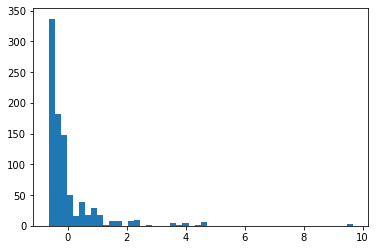

In [76]:
plt.hist(updatedDF[3],bins=50)